 CSC221-issia18-GroupProject 

## Author: <font color = "red">Issagha Diallo</font>


In [1]:
# Import the library we use to open URLs

# Import the BeautifulSoup library so we can parse HTML and XML documents

# Specify which URL/web page we are going to be scraping

# Open the url using urllib.request and put the HTML into the page variable

# Parse the HTML from our URL into the BeautifulSoup parse tree format
import urllib.request
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/Median_income'
page =  urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')

In [2]:
# Print the title with start & end tags

# Print the title WITHOUT start & end tags
#Find tables with class "wikitable sortable"
print(soup.title)
print(soup.title.string)

<title>Median income - Wikipedia</title>
Median income - Wikipedia


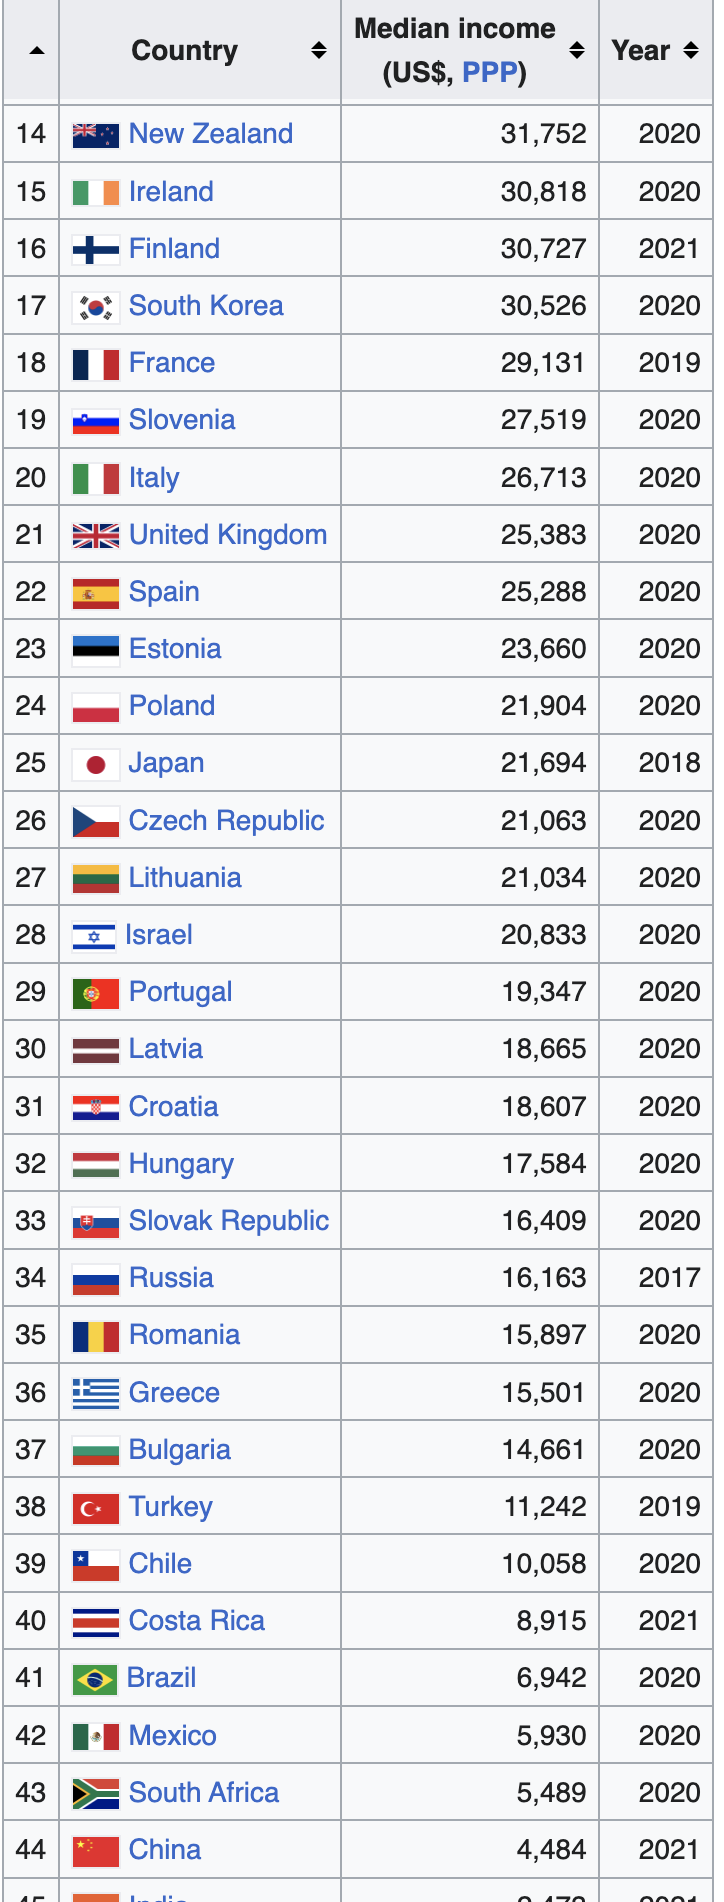

In [3]:
from IPython.display import Image
Image("Median_income.jpg")

In [4]:
table = soup.find('table', {'class': 'wikitable'})

# Extract rows from the table
rows = table.find_all('tr')

# Print the table data
print("\nTable Data:")
for row in rows[:14]:  # Print first 11 rows to ensure at least 10 rows are displayed
    cells = row.find_all(['th', 'td'])
    row_data = [cell.text.strip() for cell in cells]
    print(row_data)


Table Data:
['', 'Country', 'Median income(US$, PPP)', 'Year']
['1', 'Luxembourg', '47,568', '2020']
['2', 'United States', '46,625', '2021']
['3', 'Norway', '41,621', '2021']
['4', 'Switzerland', '39,264', '2019']
['5', 'Canada', '38,582', '2020']
['6', 'Austria', '36,992', '2020']
['7', 'Netherlands', '35,891', '2021']
['8', 'Australia', '35,518', '2020']
['9', 'Belgium', '35,153', '2020']
['10', 'Iceland', '34,316', '2017']
['11', 'Denmark', '33,569', '2019']
['12', 'Sweden', '33,472', '2021']
['13', 'Germany', '33,288', '2019']


In [8]:
# Create a list for each of column of data
A = []
B = []
C = []
D = []
F = []


# Ignore the headers (<th></th>) and find the rows (<tr></tr>)
# start looping through the rows ... to get the data for every club in the table
for row in table.find_all('tr'):
    cells = row.find_all('td')
     # Check if the length of cells is 4
    if len(cells) == 4:
        #Append each cell's text to the lists
        A.append(cells[0].get_text().strip())
        B.append(cells[1].get_text().strip())
        C.append(cells[2].get_text().strip())
        D.append(cells[3].get_text().strip())
        F.append(cells[3].get_text().strip())

In [9]:
# Import Pandas library 
import pandas as pd
# Create a DataFrame using column 'A' to start, then ...
# add each of the lists as a column in the DataFrame with the required column name
df = pd.DataFrame(A,columns=[''])
df['Country '] = B
df['Median Income '] = C
df['Year '] = F
# Modify the headers to include a dropdown arrow
df.columns = [f'{col} \u25BE' for col in df.columns]

# Display the DataFrame
df


,▾,Country ▾,Median Income ▾,Year ▾
0,1,Luxembourg,"47,568",2020
1,2,United States,"46,625",2021
2,3,Norway,"41,621",2021
3,4,Switzerland,"39,264",2019
4,5,Canada,"38,582",2020
5,6,Austria,"36,992",2020
6,7,Netherlands,"35,891",2021
7,8,Australia,"35,518",2020
8,9,Belgium,"35,153",2020
9,10,Iceland,"34,316",2017


In [12]:
# Create and save the data to a CSV file
#Save DataFrame to CSV file
csv_filename = 'CSC221-Median_income.csv'
df.to_csv(csv_filename, index=False)
print(f"\nCSV file '{csv_filename}' created successfully.")


CSV file 'CSC221-Median_income.csv' created successfully.
